In [23]:
# imports
from aequitas.plotting import Plot
ap = Plot()
import pandas as pd

from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, label_binarize, LabelBinarizer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [11]:
#added headers
df = pd.read_csv("original.csv", skipinitialspace=True)
#df = df.str.split(',',expand=True)

In [12]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [13]:
# remove spaces in csv, dropna or fillna
#df[].fillna()
df.drop_duplicates().reset_index(drop=True)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32532,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32533,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32534,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
df.salary.value_counts()

<=50K    24719
>50K      7841
Name: salary, dtype: int64

In [15]:
# save df as cleaned csv file
df.to_csv("cleaned_data.csv")

## OneHot Encoder model

In [16]:
df.salary.value_counts()

<=50K    24719
>50K      7841
Name: salary, dtype: int64

In [17]:
y = df.pop("salary")
X = df

In [18]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

# use this later to construct the dataFrame aequitas requires
df_aq = X_test.reset_index(drop=True).copy()

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
X_train = ohe.fit_transform(X_train.values)
X_test = ohe.transform(X_test.values)

lb = LabelBinarizer()
y_train = label_binarize(y_train.values, classes=['<=50K','>50K']).ravel()
y_test = label_binarize(y_test.values, classes=['<=50K', '>50K']).ravel()

X_train shape:  (24420, 14)
X_test shape:  (8140, 14)


In [22]:
import numpy as np

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

scores = lr.predict_proba(X_test)
pred = lr.predict(X_test)

f1 = f1_score(y_test, pred)
print(f"F1 score: {f1: 4f}")

F1 score:  0.710316


In [25]:
#save model
filename="logistic_model.sav"
pickle.dump(lr, open(filename, "wb"))

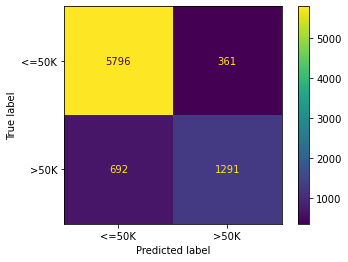

In [26]:
cm = confusion_matrix(y_test, pred, labels=[0,1])
ConfusionMatrixDisplay(cm, display_labels=["<=50K",">50K"]).plot()

In [27]:
# construct the dataframe that aequitas will use
df_aq['label_value'] = y_test
df_aq['score'] = pred
df_aq.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,label_value,score
0,38,Private,680390,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,20,United-States,0,0
1,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,1
2,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,1,1
3,51,Private,306108,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,1,0
4,46,Private,124071,Masters,14,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,44,United-States,0,1
